# Desafio do Titanic

O <a href="https://www.kaggle.com/c/titanic/"> desafio do Titanic </a> apresentado pela Kaggle é uma competição em que o objetivo é prever a sobrevivência ou a morte de um passageiro com base em um conjunto de variáveis que o descrevem, como sua idade, sexo ou classe de passageiros no barco.
    
A solucão aqui apresentada foi fortemente baseada na solução encontrada nesse <a href="https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge/blob/master/article_1.ipynb"> link</a>.

# I - Análise exploratória de dados

Como em diferentes projetos de dados, primeiro vamos mergulhar nos dados e criar nossas primeiras intuições.

Nesta seção, faremos quatro coisas.

- Extração de dados: carregaremos o conjunto de dados e daremos uma primeira olhada nele.
- Limpeza: preencheremos os valores ausentes.
- Plotagem: criaremos gráficos interessantes que (esperançosamente) identificarão correlações e insights ocultos dos dados.
- Suposições: formularemos hipóteses nos gráficos.

Nós ajustamos um pouco o estilo deste notebook para ter gráficos centralizados

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

Agora importaremos as bibliotecas importantes

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

Dois conjuntos de dados estão disponíveis: um conjunto de treinamento e um conjunto de testes. Usaremos o conjunto de treinamento para criar nosso modelo preditivo e o conjunto de testes para pontuá-lo e gerar um arquivo de saída para enviar no sistema de avaliação do Kaggle.

Vamos ver como esse procedimento é feito no final deste post.

Agora vamos começar carregando o conjunto de treinamento.

In [3]:
data = pd.read_csv('./data/train.csv')

In [4]:
print (data.shape)

(891, 12)


Nós temos:

- 891 linhas
- 12 colunas

Pandas permite que você dê uma espiada nos seus dados.

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


A coluna Survived (Sobreviveu) é a ** variável de destino**. Se Survived = 1 o passageiro sobreviveu, caso contrário ele está morto. Esta é a variável que vamos prever.

As outras variáveis descrevem os passageiros. Eles são os **features**.

- PassengerId: e id atribuído a cada viajante no barco
- Pclass: a classe de passageiros. Tem três valores possíveis: 1,2,3 (primeira, segunda e terceira classe)
- O nome do passageiro
- O sexo
- A idade
- SibSp: número de irmãos e cônjuges viajando com o passageiro
- Parch: número de pais e filhos viajando com o passageiro
- O número do bilhete
- A Tarifa do bilhete
- O número da cabine
- O embarque. Isso descreve três possíveis áreas do Titanic das quais as pessoas embarcam. Três valores possíveis S, C, Q

Pandas permite que você tenha uma descrição estatística simples de alto nível dos recursos numéricos. Isso pode ser feito usando o método describe.

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A variável **count** mostra que 177 valores estão faltando na coluna **Age**.

Uma solução é preencher os valores nulos com a idade mediana. Poderíamos também preencher com a idade média, mas a mediana é mais robusta para os **outliers**.

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())

Vamos ver os resultados

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Perfeito.

Vamos agora fazer alguns gráficos.

Vamos visualizar a sobrevivência com base no gênero.

In [9]:
data['Died'] = 1 - data['Survived']

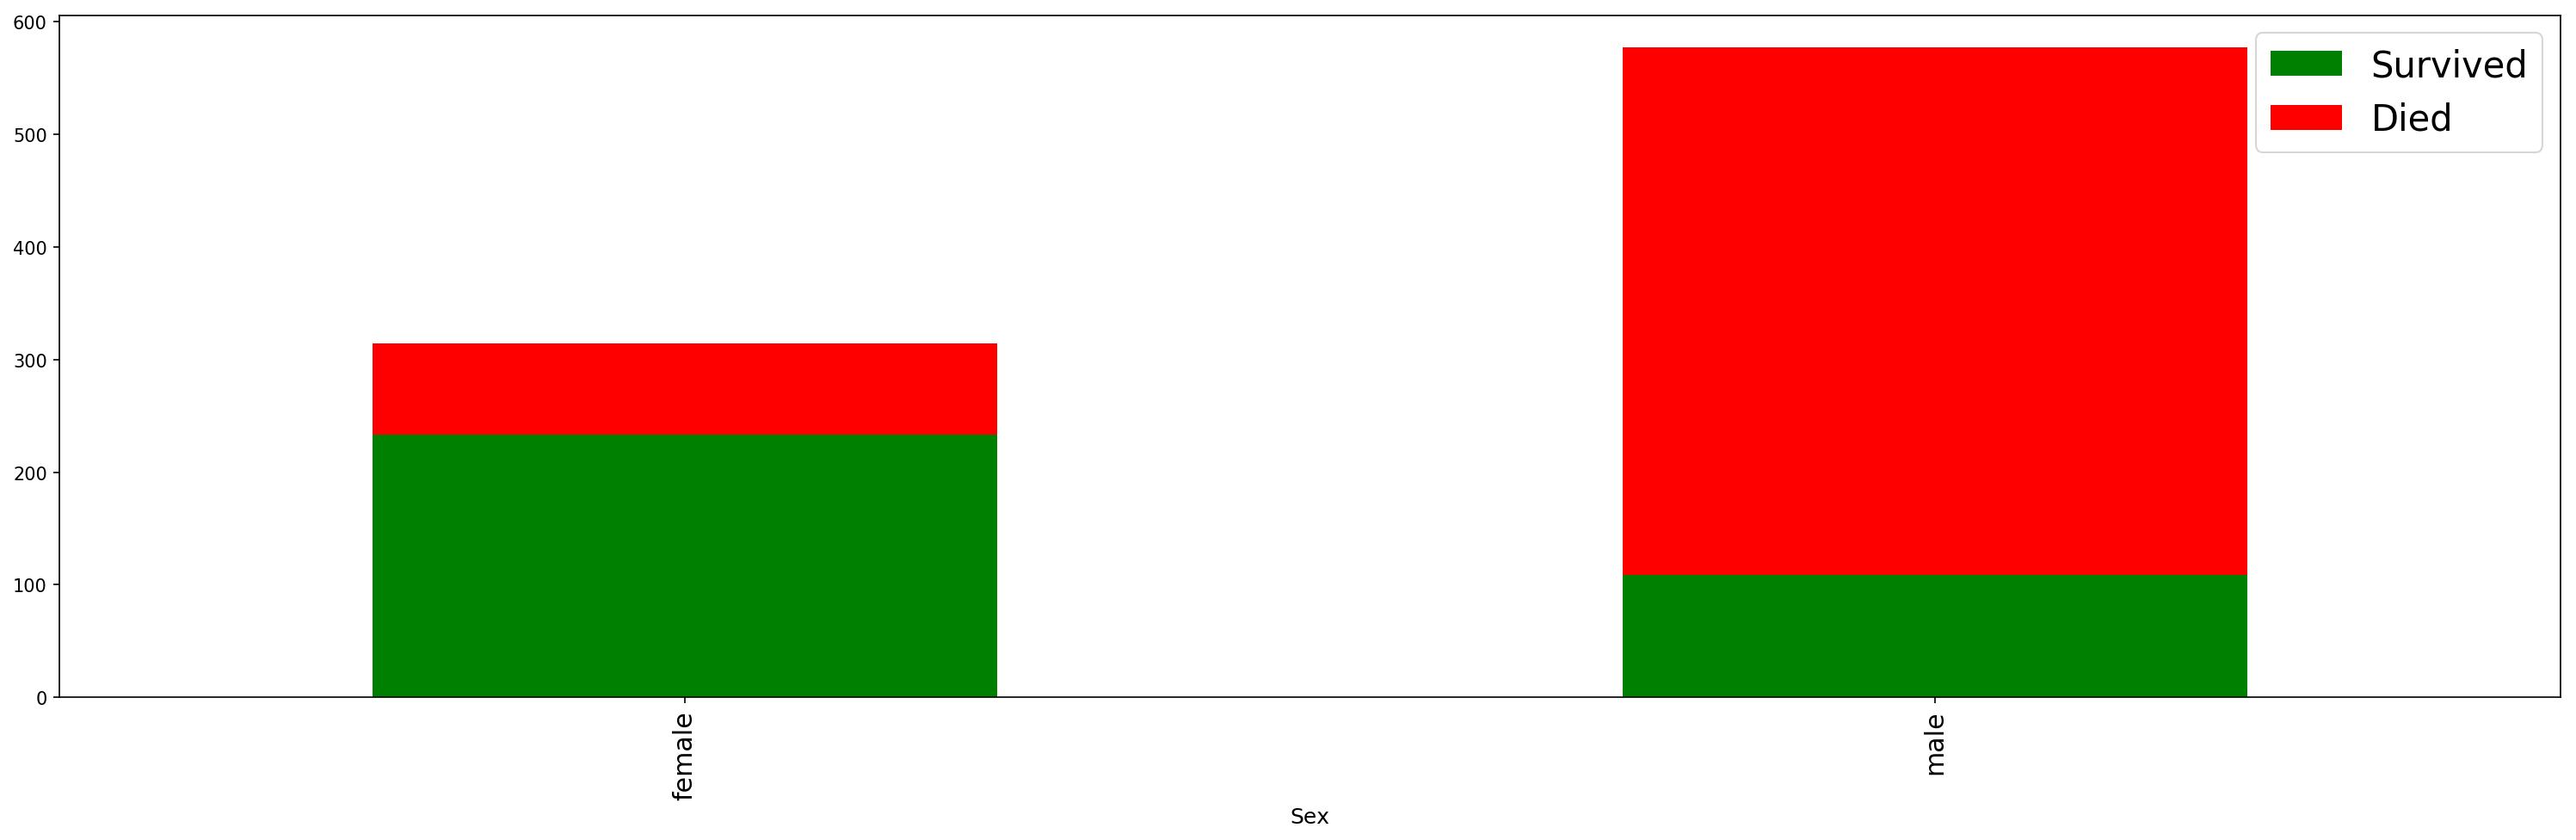

In [10]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

Parece que os passageiros do sexo masculino são mais propensos a morrer.

Vamos traçar o mesmo gráfico, mas com a relação.

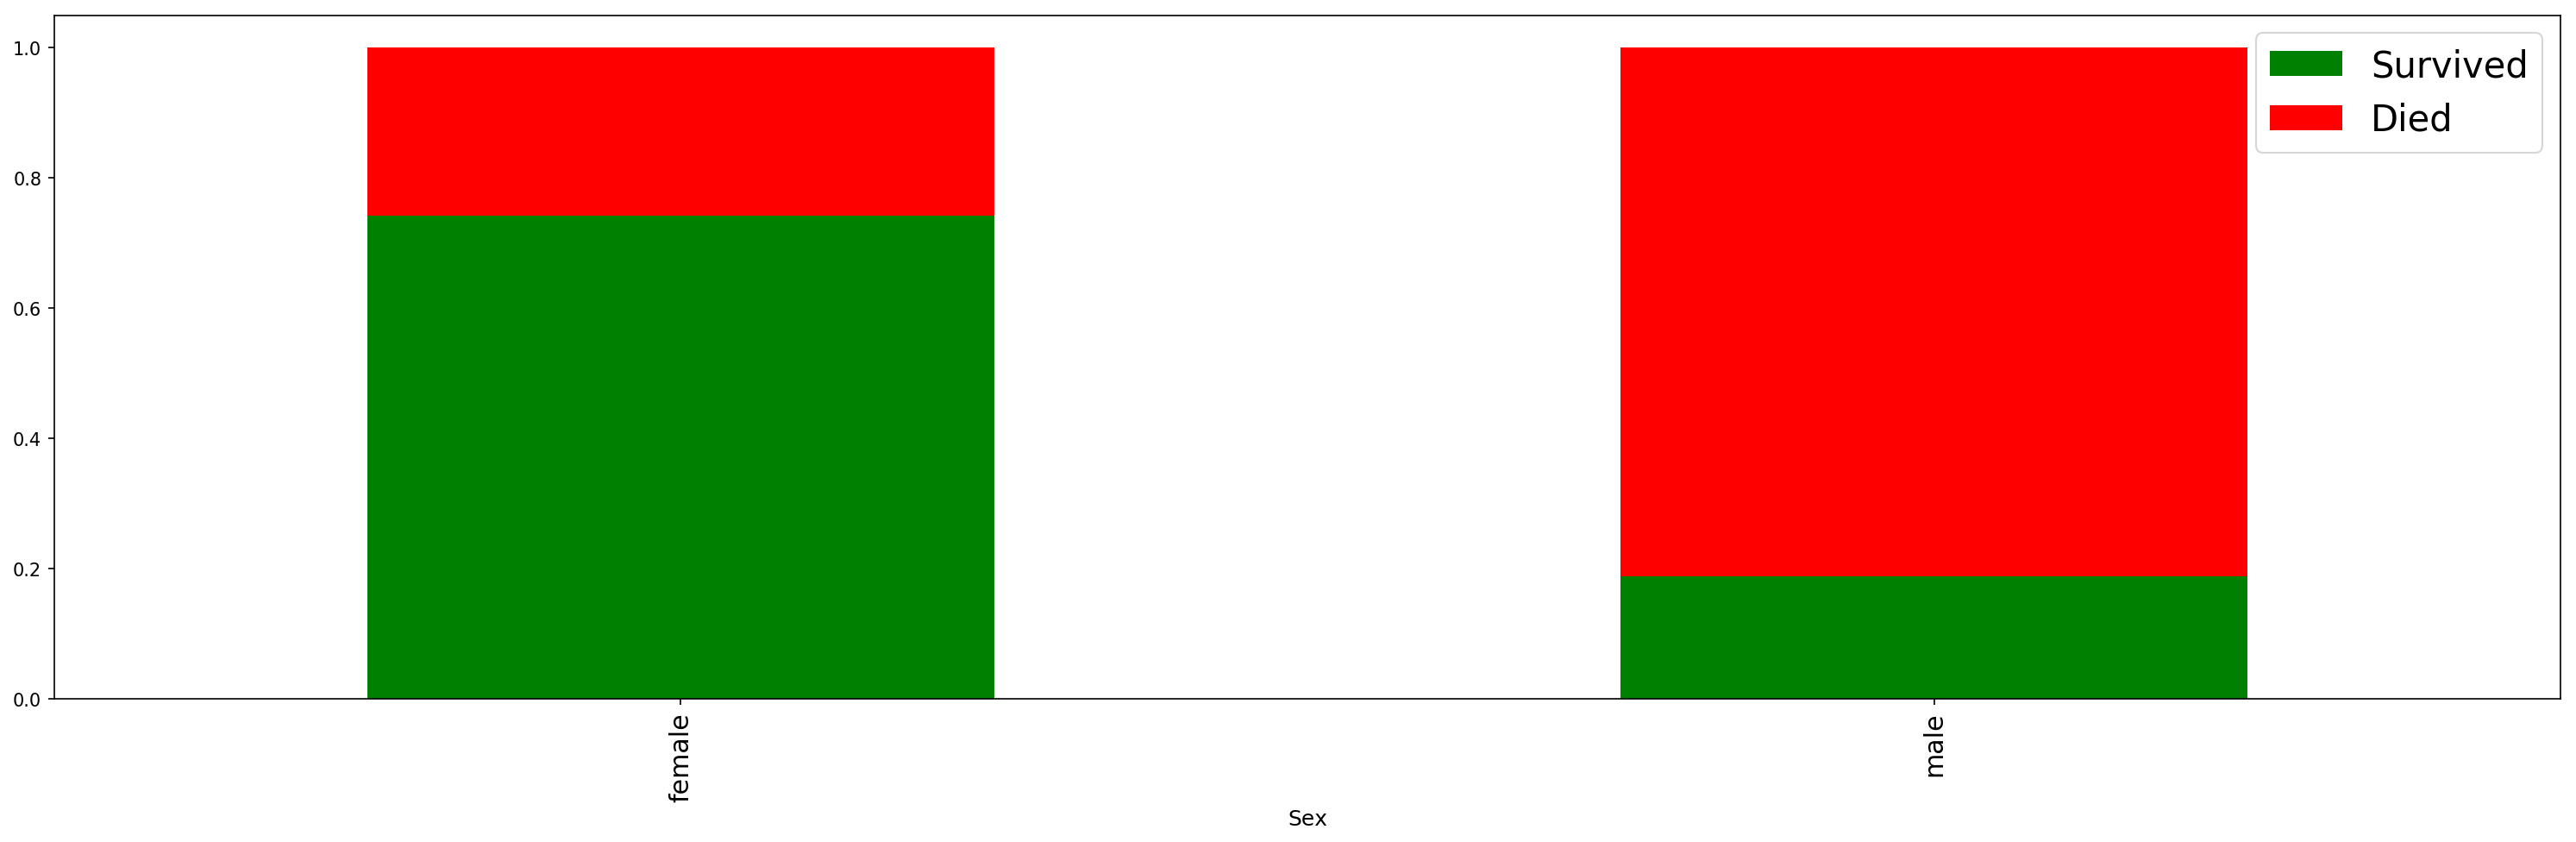

In [11]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

A variável sexo parece ser uma característica discriminativa. As mulheres são mais propensas a sobreviver.

Vamos agora correlacionar a sobrevivência com a variável idade.

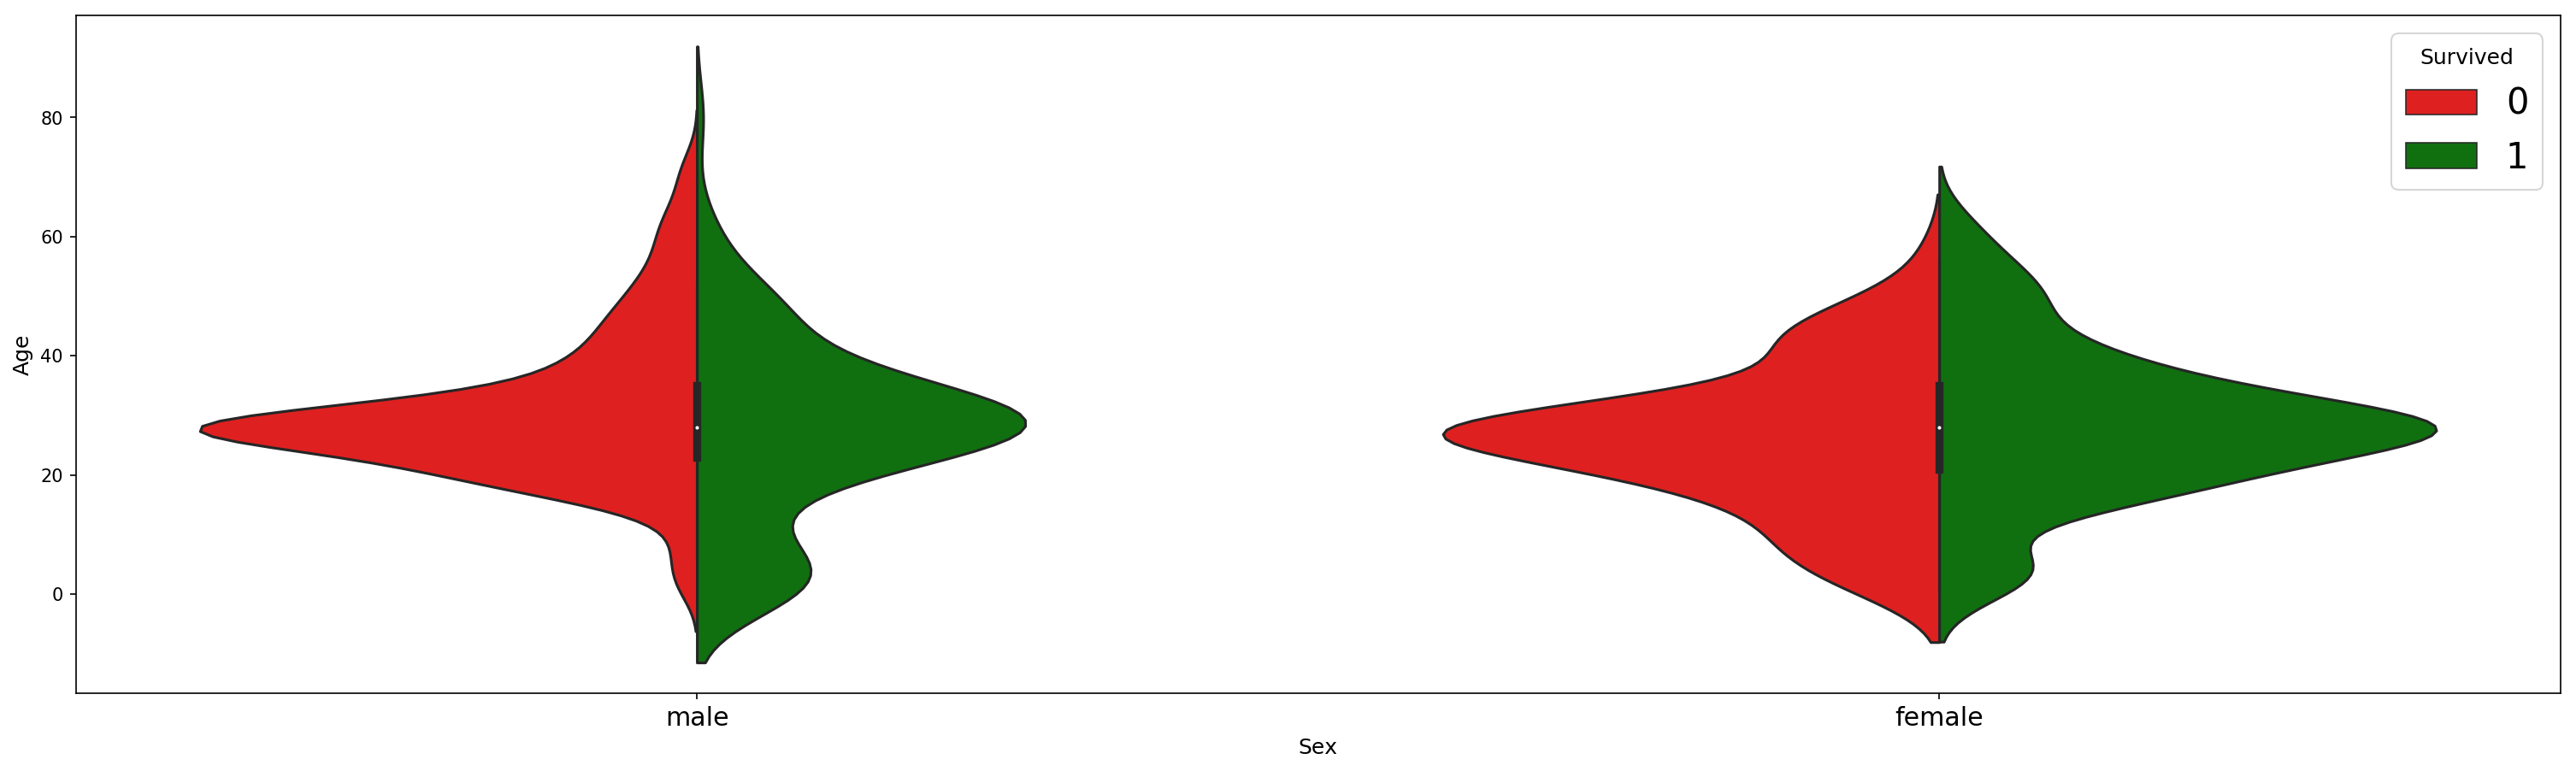

In [12]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

Como vimos no gráfico acima e validamos pelo seguinte:

- As mulheres sobrevivem mais que os homens, conforme representado pelo maior histograma verde feminino

Agora vemos que:
- A idade condiciona a sobrevivência dos passageiros do sexo masculino:
    - Machos mais jovens tendem a sobreviver
    - Um grande número de passageiros entre 20 e 40 morreram

- A idade não parece ter um impacto direto sobre a sobrevivência feminina

Esses gráficos confirmam que um antigo código de conduta que marinheiros e capitães seguem em situações ameaçadoras: <b>"Mulheres e crianças primeiro!"</b>.

Agora vamos nos concentrar na tarifa do bilhete de cada passageiro e ver como isso pode afetar a sobrevivência.

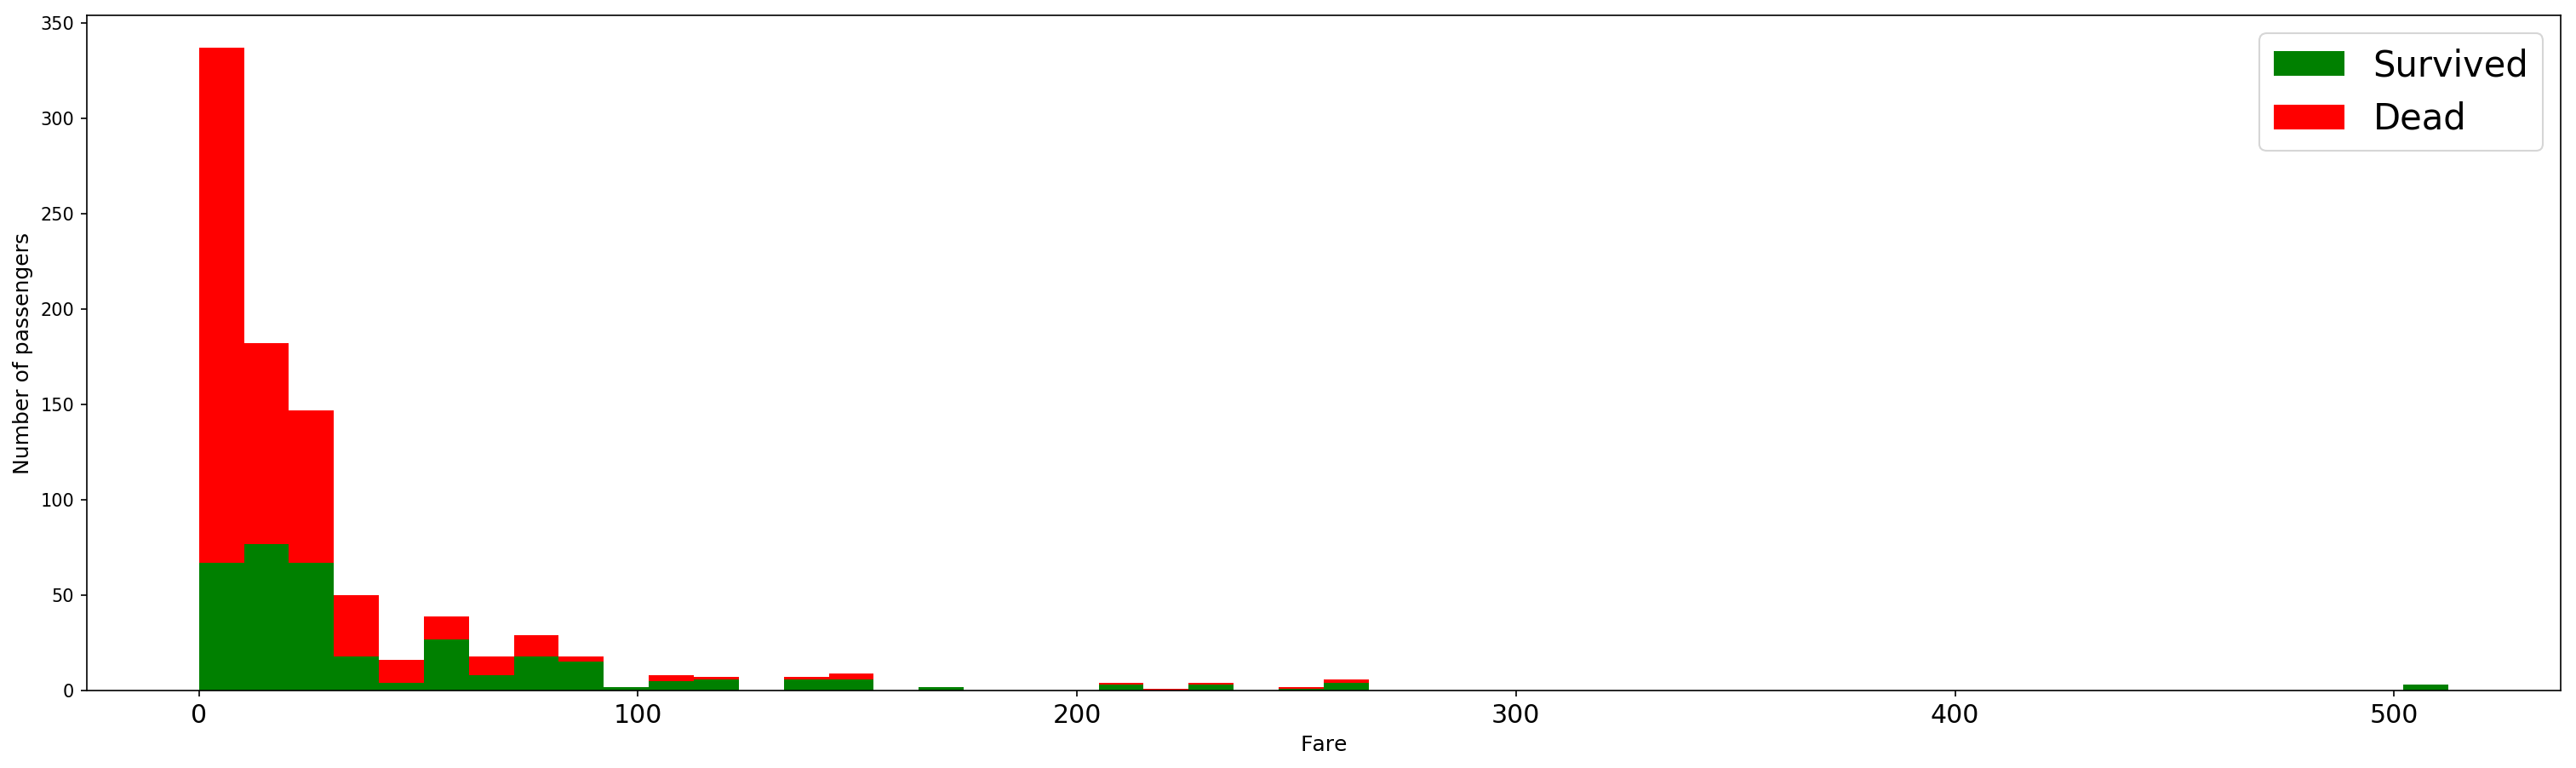

In [13]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

Passageiros com tarifas mais baratas são mais propensos a morrer. 
Em outras palavras, os passageiros com passagens mais caras e, portanto, um status social mais importante, parecem ser resgatados primeiro.

Vamos agora combinar a idade, a tarifa e a sobrevivência em um único gráfico.

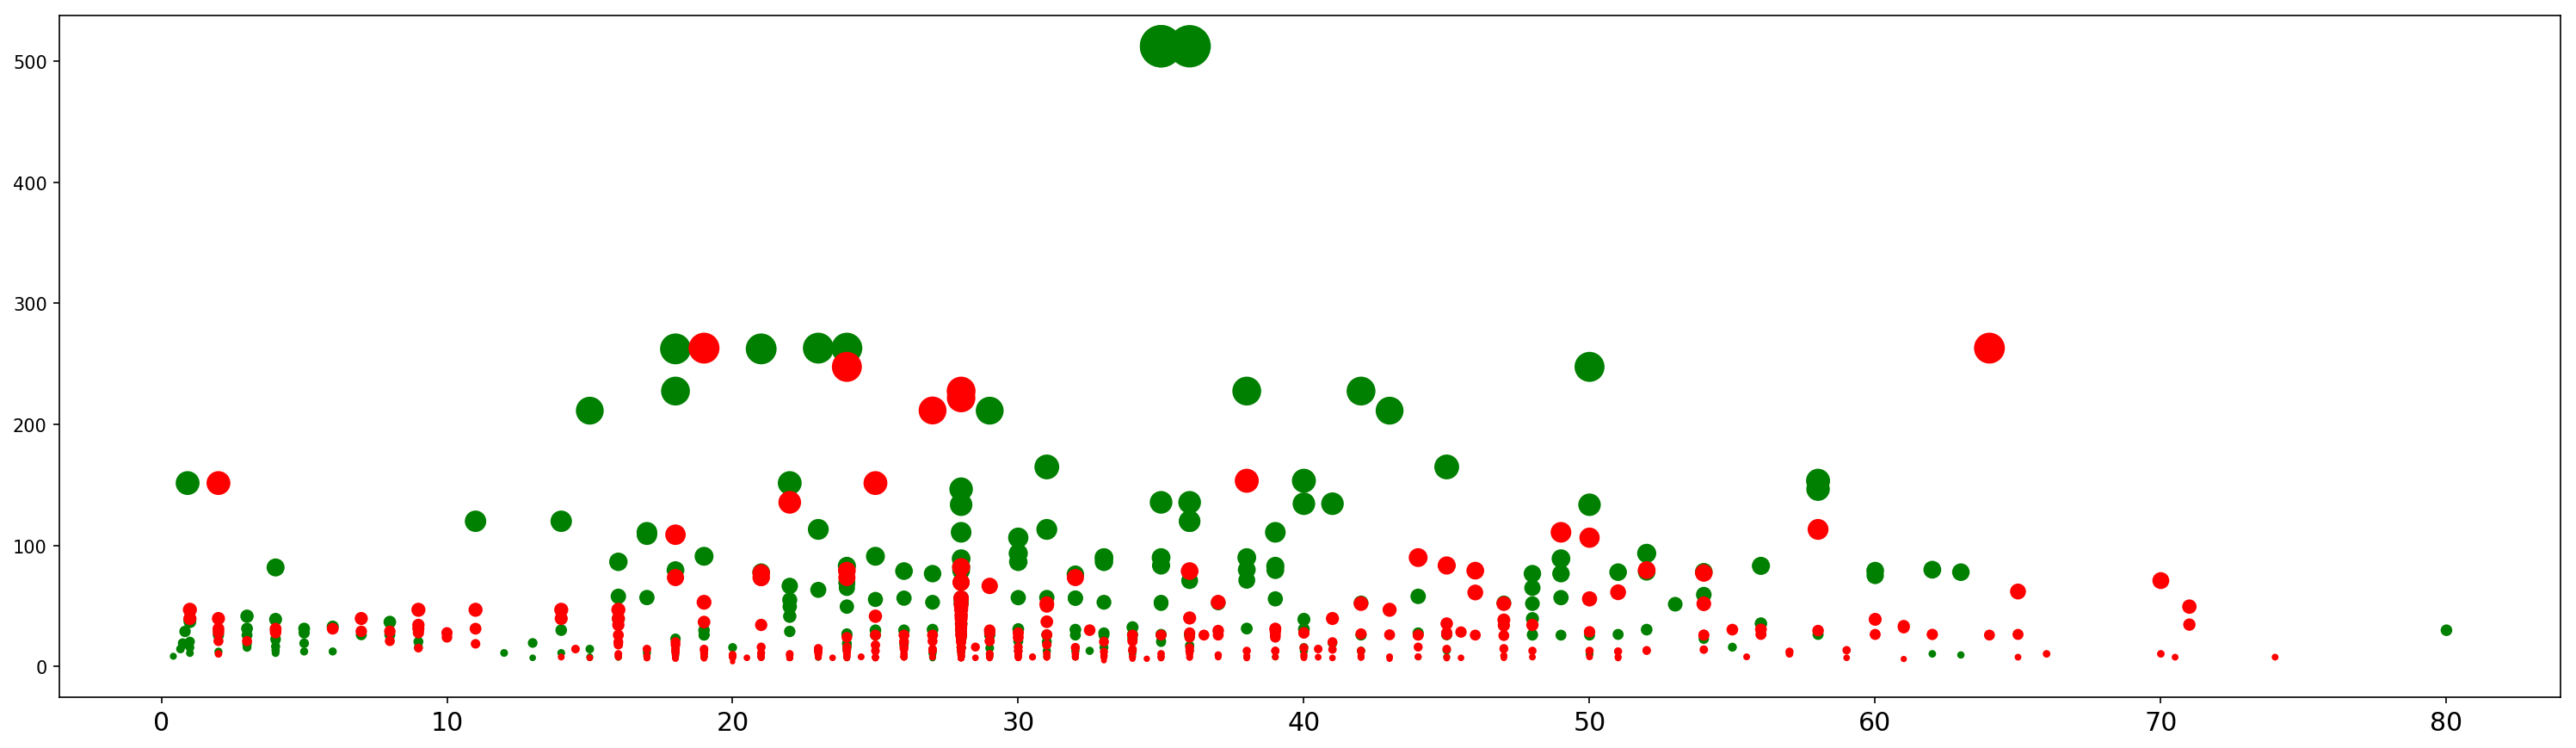

In [14]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

O tamanho dos círculos é proporcional à tarifa do bilhete.

No eixo x, temos as idades e o eixo y, consideramos a tarifa do bilhete.

Podemos observar diferentes clusters:

1. Grandes pontos verdes entre x = 20 e x = 45: adultos com as maiores tarifas
2. Pequenos pontos vermelhos entre x = 10 e x = 45, adultos das classes mais baixas no barco
3. Pequenos pontos verdes entre x = 0 e x = 7: estas são as crianças que foram salvas

Na verdade, a tarifa do bilhete se correlaciona com a classe, como vemos no gráfico abaixo.

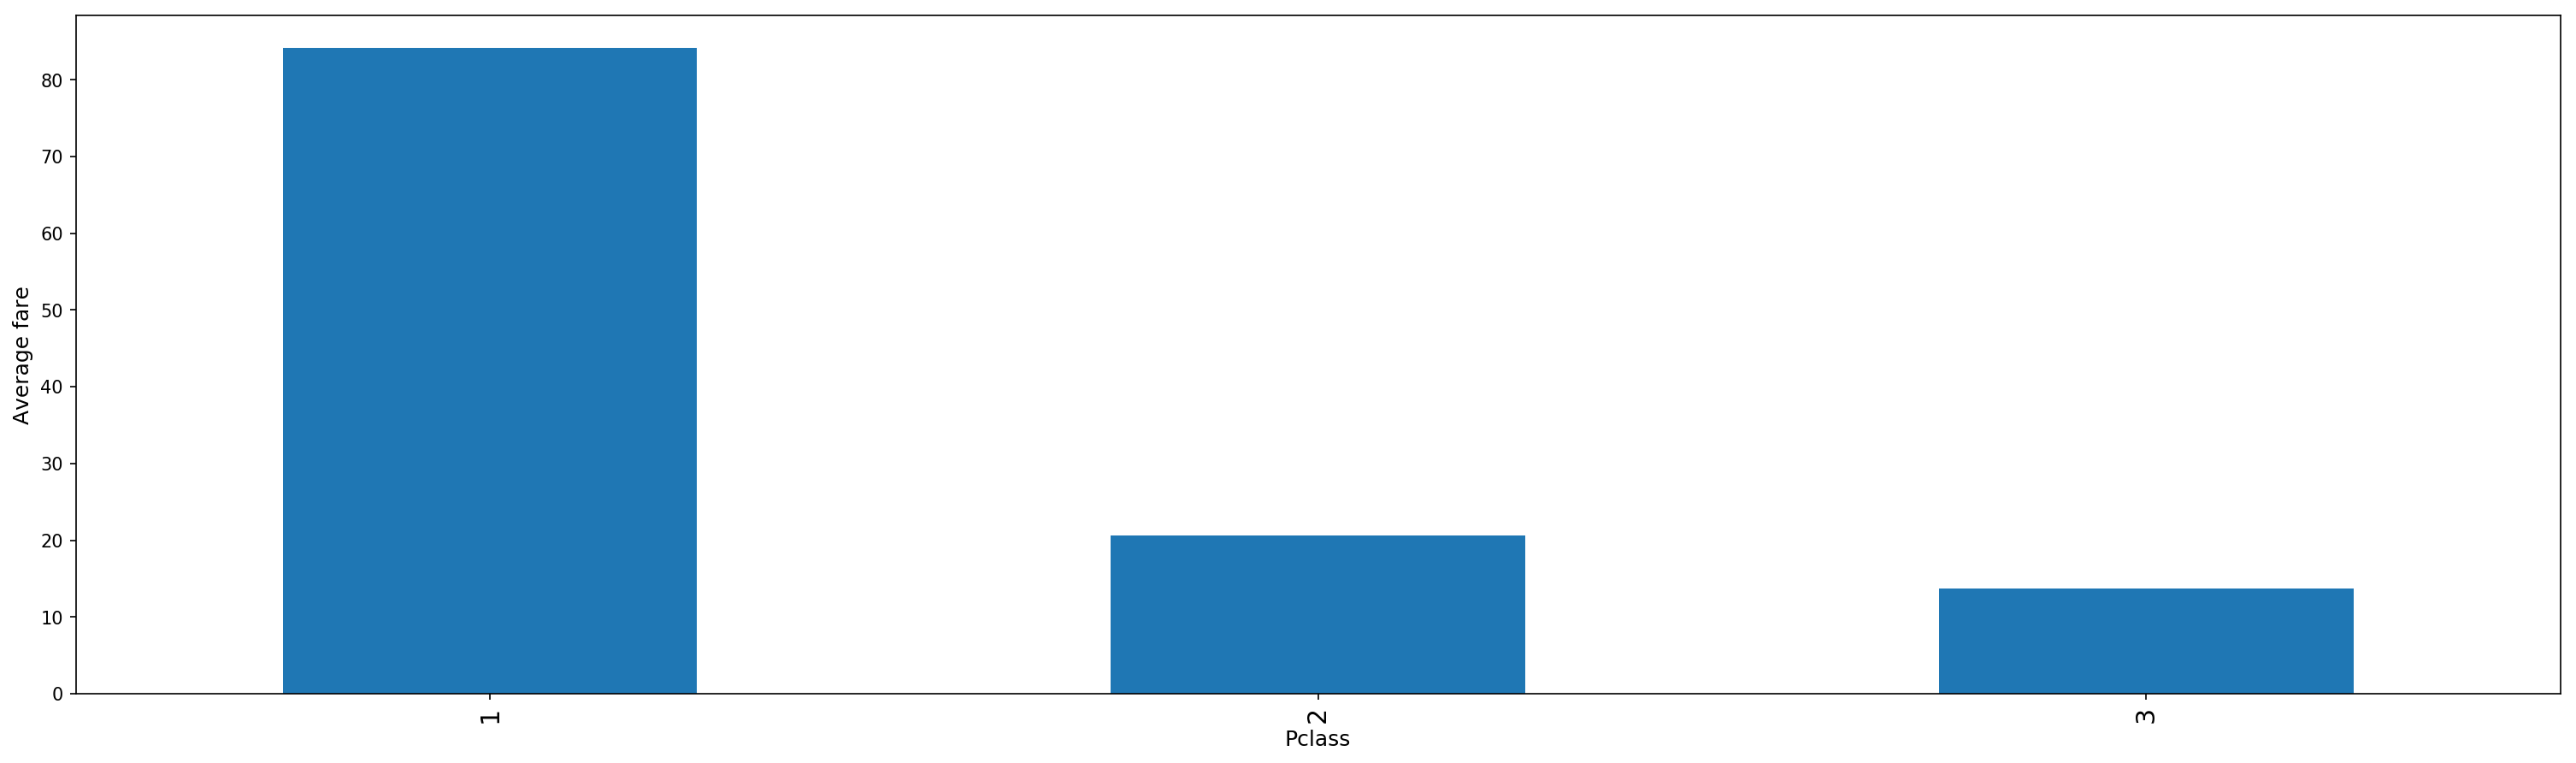

In [15]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

Vamos agora ver como o local de embarque afeta a sobrevivência.

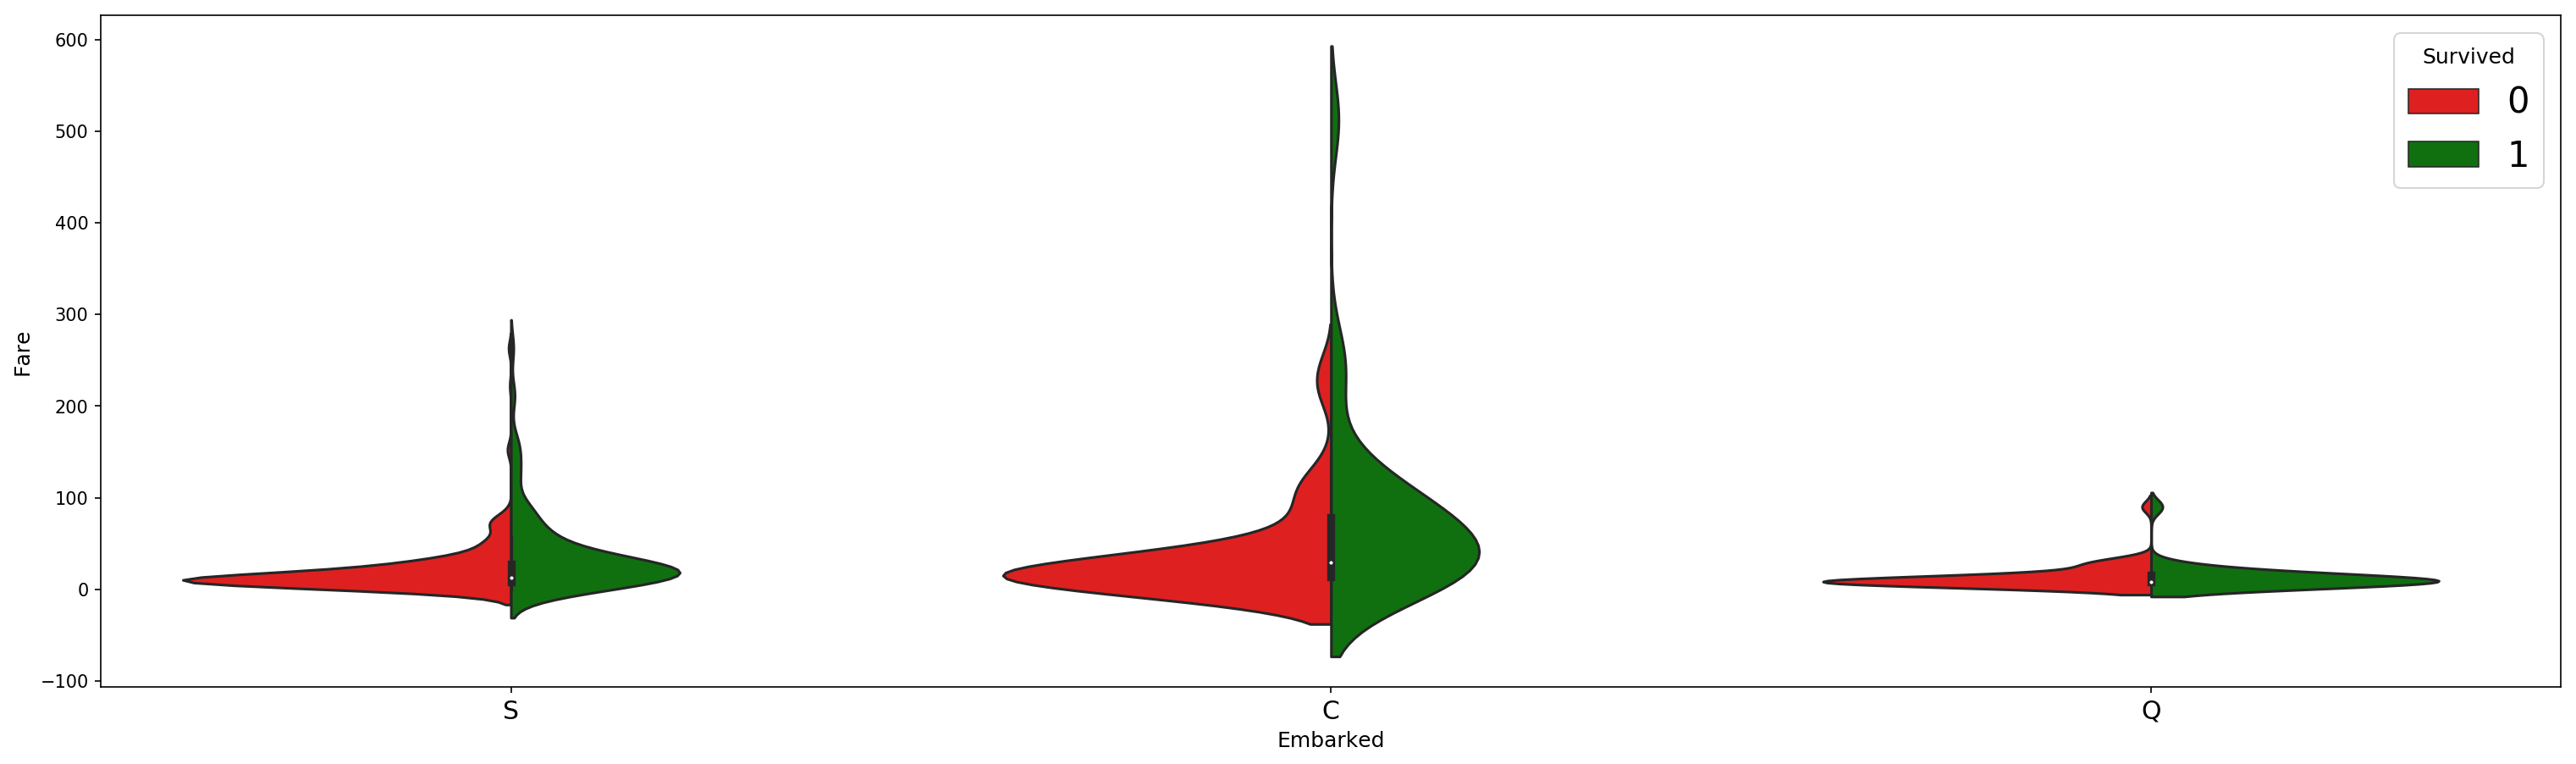

In [16]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

Parece que o embarque C abrange os bilhetes mais caros, portanto, os passageiros que pagam os preços mais altos são aqueles que sobrevivem.

Também vemos isso acontecendo no embarque S e menos no embarque Q.

Vamos agora parar com a exploração de dados e mudar para a próxima parte.

# II - Engenharia de Feature

Na parte anterior, brincamos com os dados e identificamos algumas correlações interessantes.

Nesta parte, veremos como processar e transformar essas variáveis de forma que os dados se tornem gerenciáveis por um algoritmo de aprendizado de máquina.

Também criaremos ou "projetaremos" recursos adicionais que serão úteis na construção do modelo.

Veremos ao longo do caminho como processar variáveis de texto, como os nomes dos passageiros, e integrar essas informações em nosso modelo.

Vamos quebrar nosso código em funções separadas para mais clareza.

Mas primeiro, vamos definir uma função de impressão que afirma se um recurso foi ou não processado.

In [17]:
def status(feature):
    print ('Processing', feature, ': ok')

### Carregando os dados

Um truque ao iniciar um problema de aprendizado de máquina é anexar o conjunto de treinamento ao conjunto de teste.

Nós projetaremos novos recursos usando o conjunto de treino para evitar o vazamento de informações. Então, adicionaremos essas variáveis ao conjunto de testes.
Vamos carregar o cojunto de treino e teste e juntá-los.

In [18]:
def get_combined_data():
    # lendo os dados de treino
    train = pd.read_csv('./data/train.csv')
    
    # lendo os dados de teste
    test = pd.read_csv('./data/test.csv')

    # extraindo e removendo os dados do conjunto de treinamento
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # Mesclando dados de treino e de teste para engenharia futura de recursos 
    # também removeremos o PassengerID, já que este não é um recurso informativo
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [19]:
combined = get_combined_data()

Vamos olhar o formato :

In [20]:
print (combined.shape)

(1309, 10)


Conjuntos de treino e teste estão combinados

Você pode notar que o número total de linhas (1309) é o número exato da soma do número de linhas no conjunto de treino e no conjunto de teste.

In [21]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extraindo os títulos de passageiro

Ao olhar para os nomes dos passageiros, pode-se imaginar como processá-los para extrair uma informação útil.

Se você olhar de perto estes primeiros exemplos:

- Braund, <b> Sr.</b> Owen Harris
Heikkinen, <b>Senhorita</b> Laina
Oliva y Ocana, <b>Dona.</b> Fermina
Peter, <b>Mestre.</b> Michael J

Você vai notar que cada nome tem um título! Esta pode ser uma simples Miss ou Sra mas às vezes pode ser algo mais sofisticado como Mestre, Sir ou Dona. Nesse caso, poderíamos introduzir uma informação adicional sobre o status social simplesmente analisando o nome e extraindo o título e convertendo em uma variável binária.

Vamos ver como faremos isso na função abaixo.

Vamos primeiro ver os títulos diferentes que existem no conjunto de treino

In [22]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [23]:
print (titles)

{'Don', 'Capt', 'Rev', 'Ms', 'Lady', 'Mr', 'Major', 'Col', 'Dr', 'Jonkheer', 'the Countess', 'Mlle', 'Miss', 'Master', 'Mrs', 'Mme', 'Sir'}


In [24]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # extraímos os títulos de cada nome
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # um mapa de título mais agregado
    # mapeamos cada título
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

Esta função analisa os nomes e extrai os títulos. Em seguida, mapeia os títulos para categorias de títulos. Nós selecionamos:
- Officer (Oficial)
- (Royalty) Realeza
- Mr (Sr)
- Mrs (Sra)
- Miss (Senhorita)
- Master (Mestre)

Vamos executar !


In [25]:
combined = get_titles()

Processing Title : ok


In [26]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Vamos checar se os títulos foram preenchidos corretamente.

In [27]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


Há de fato um valor NaN na linha 1305. Na verdade, o nome correspondente é Oliva y Ocana, Dona. Fermina

Este título não foi encontrado no conjunto de treino.

Perfeito. Agora nós temos uma coluna dicional chamada <b>Title</b> (título) que contém informação.

### Processando as idades

Vimos na primeira parte que a variável Idade estava faltando 177 valores. Este é um grande número (~ 13% do conjunto de dados). Simplesmente substituí-los pela média ou idade mediana pode não ser a melhor solução, uma vez que a idade pode diferir em grupos e categorias de passageiros.

Para entender por que, vamos agrupar nosso conjunto de dados por sexo, título e classe de passageiros e, para cada subconjunto, calcular a idade mediana.

Para evitar o vazamento de dados do conjunto de testes, preenchemos as idades que faltam no conjunto de treino usando o conjunto de treino e preenchemos as idades no conjunto de teste usando valores calculados a partir do conjunto de treino também.

Número de idades faltando no conjunto de treino

In [28]:
print (combined.iloc[:891].Age.isnull().sum())

177


Número de idades faltando no conjunto de teste

In [29]:
print (combined.iloc[891:].Age.isnull().sum())

86


In [30]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [31]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


Este dataframe vai nos ajudar a preencher idades vazias baseada em diferentes critérios.

Observe a coluna de idade mediana e veja como esse valor pode ser diferente com base no sexo, na classificação e no título juntos.

Por exemplo:

- Se o passageiro é do sexo feminino, da Pclasse 1, e da realeza, a idade mediana é de 40,5.
- Se o passageiro é do sexo masculino, da Pclass 3, com um título de Mr (Sr.), a idade mediana é de 26 anos.

Vamos criar uma função que preencha a idade ausente combinada com base nesses atributos diferentes.

In [32]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # uma função que preenche os valores ausentes da variável Idade
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [33]:
combined = process_age()

Processing age : ok


Perfeito. As idades que faltam foram substituídas.

No entanto, notamos um valor ausente no Fare (tarifa), dois valores ausentes no Embarked (local onde embarcou) e muitos valores ausentes no Cabin (número da cabine). Voltaremos a essas variáveis mais tarde.

Vamos agora processar os nomes.

In [34]:
def process_names():
    global combined
    # nós limpamos a variável Name
    combined.drop('Name', axis=1, inplace=True)
    
    # codificação na variável dummy
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removendo a variável title
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

Essa função descarta a coluna Nome, pois não a usaremos mais porque criamos uma coluna Título.

Então, codificamos os valores do título usando uma codificação dummy.

Você pode aprender sobre codificação dummy e como fazê-lo facilmente em Pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html">aqui</a>.

In [35]:
combined = process_names()

Processing names : ok


In [36]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


Como você pode ver :
- Não há mais um recurso de nome.
- Novas variáveis (Title_X) apareceram. Esses recursos são binários.
    - Por exemplo, se Title_Mr = 1, o título correspondente é Mr.

### Processando a tarifa

Vamos preencher os valores que faltam de tarifa com a média computada no conjunto de treino

In [37]:
def process_fares():
    global combined
    # há um valor faltante - substituindo-o pela média.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

Esta função substitui o valor ausente de tarifa com a média.

In [38]:
combined = process_fares()

Processing fare : ok


### Processando o local de embarque

In [39]:
def process_embarked():
    global combined
    # dois valores de local de embarque em falta - enchendo-os com o mais frequente no conjunto de treino (S)
    combined.Embarked.fillna('S', inplace=True)
    # codificação dummy 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

Essa função substitui os dois valores ausentes de Embarked pelo valor Embarked mais frequente.

In [40]:
combined = process_embarked()

Processing embarked : ok


In [41]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### Processando o número da cabine

In [42]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [43]:
print (train_cabin)

{'B', 'U', 'F', 'A', 'E', 'D', 'T', 'G', 'C'}


In [44]:
print (test_cabin)

{'B', 'U', 'F', 'A', 'E', 'D', 'G', 'C'}


Não temos qualquer letra de cabine no conjunto de teste que não está presente no conjunto de treino.

In [45]:
def process_cabin():
    global combined    
    # substituindo cabines ausentes por U (para Desconhecido)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapeando cada valor de cabine com a letra da cabine
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # codificação dummy  ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

Esta função substitui os valores NaN por U (para Unknow). Em seguida, mapeia cada valor de Cabine para a primeira letra. Em seguida, codifica os valores da cabine usando codificação dummy novamente.

In [46]:
combined = process_cabin()

Processing cabin : ok


Não temos mais valores faltantes.

In [47]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processando o Sexo

In [48]:
def process_sex():
    global combined
    # mapeando valores de string para um numérico
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

Esta função mapeia os valores de string male e female para 1 e 0, respectivamente.

In [49]:
combined = process_sex()

Processing Sex : ok


### Processando Pclass

In [50]:
def process_pclass():
    
    global combined
    # codificação em 3 categorias:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adicionando a variável dummy
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removendo "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

Esta função codifica os valores de Pclass (1,2,3) usando uma codificação dummy.

In [51]:
combined = process_pclass()

Processing Pclass : ok


### Processando Ticket

Vamos primeiro ver quantos diferentes prefixos de ingressos temos em nosso conjunto de dados

In [52]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [53]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [54]:
print (len(tickets))

37


In [55]:
def process_ticket():
    
    global combined
    
    # uma função que extrai cada prefixo do ticket, retorna 'XXX' se não houver prefixo (ou seja, o ticket é um dígito)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extraindo variáveis dummy a partir tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [56]:
combined = process_ticket()

Processing Ticket : ok


### Processando familia

Esta parte inclui a criação de novas variáveis com base no tamanho da família (o tamanho é, a propósito, outra variável que criamos).

Essa criação de novas variáveis é feita sob uma suposição realista: as famílias numerosas são agrupadas, portanto, é mais provável que sejam resgatadas do que as que viajam sozinhas

In [57]:
def process_family():
    
    global combined
    # introdução de um novo recurso: o tamanho das famílias (incluindo o passageiro)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introduzindo outros recursos baseados no tamanho da família
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 >= s else 0)
    
    status('family')
    return combined

Esta função apresenta 4 novos recursos:

- FamilySize: o número total de parentes incluindo o próprio passageiro (ele / ela).
- Sigleton: uma variável booleana que descreve famílias de tamanho = 1
- SmallFamily: uma variável booleana que descreve famílias de 2 <= tamanho <= 4
- LargeFamily: uma variável booleana que descreve famílias de 5 >= tamanho

In [58]:
combined = process_family()

Processing family : ok


In [59]:
print (combined.shape)

(1309, 67)


Acabamos com um total de 67 features.

In [60]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1


# III - Modelagem

Nesta parte, usamos nosso conhecimento dos passageiros com base nos recursos que criamos e, em seguida, construímos um modelo estatístico. Você pode pensar neste modelo como uma caixa que tritura as informações de qualquer passageiro novo e decide se ele sobrevive ou não.

Há uma grande variedade de modelos para usar, desde a regressão logística (logistic regression) até as árvores de decisão (decision trees) e as mais sofisticadas, como florestas aleatórias (random forests) e árvores com aumento de gradiente (gradient boosted trees).

Nós estaremos usando Florestas Aleatórias. Florestas aleatórias provou uma grande eficiência nas competições do Kaggle.

Para mais detalhes sobre por que os métodos ensemble têm um bom desempenho, você pode consultar estas postagens:

- http://mlwave.com/kaggle-ensembling-guide/
- http://www.overkillanalytics.net/more-is-always-better-the-power-of-simple-ensembles/

Voltando ao nosso problema, agora temos que:

1. Quebre o conjunto de dados combinado no conjunto de treino e no conjunto de teste.
2. Use o conjunto de treino para criar um modelo preditivo.
3. Avalie o modelo usando o conjunto de treino.
4. Teste o modelo usando o conjunto de teste e gere um csv e envie o arquivo para a plataforma do kaggle.

Tenha em mente que teremos que reiterar em 2 e 3. até que uma pontuação de avaliação aceitável seja alcançada.

Vamos importar as bibliotecas utilizadas.

In [61]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

Para avaliar nosso modelo, usaremos uma validação cruzada de 5 com a métrica acurácia, já que é a métrica usada pela competição no placar.

Para fazer isso, vamos definir uma pequena função de pontuação.

In [62]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

Recuperar o conjunto de treino e o conjunto de teste do conjunto de dados combinado é uma tarefa fácil.

In [63]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [64]:
train, test, targets = recover_train_test_target()

## Feature selection - Seleção de Features

Chegamos a mais de 30 recursos até o momento. Esse número é bem grande.
Quando a engenharia de recursos é feita, geralmente tendemos a diminuir a dimensionalidade selecionando o número "correto" de recursos que capturam o essencial.
De fato, a seleção de recursos vem com muitos benefícios:

- Diminui a redundância entre os dados
- Acelera o processo de treinamento
- Reduz o overfitting

Os estimadores/classificadores baseados em árvore podem ser usados para calcular as importâncias de feature, que, por sua vez, podem ser usados para descartar feautres irrelevantes.

In [65]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

Vamos dar uma olhada na importância de cada feature.

In [66]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

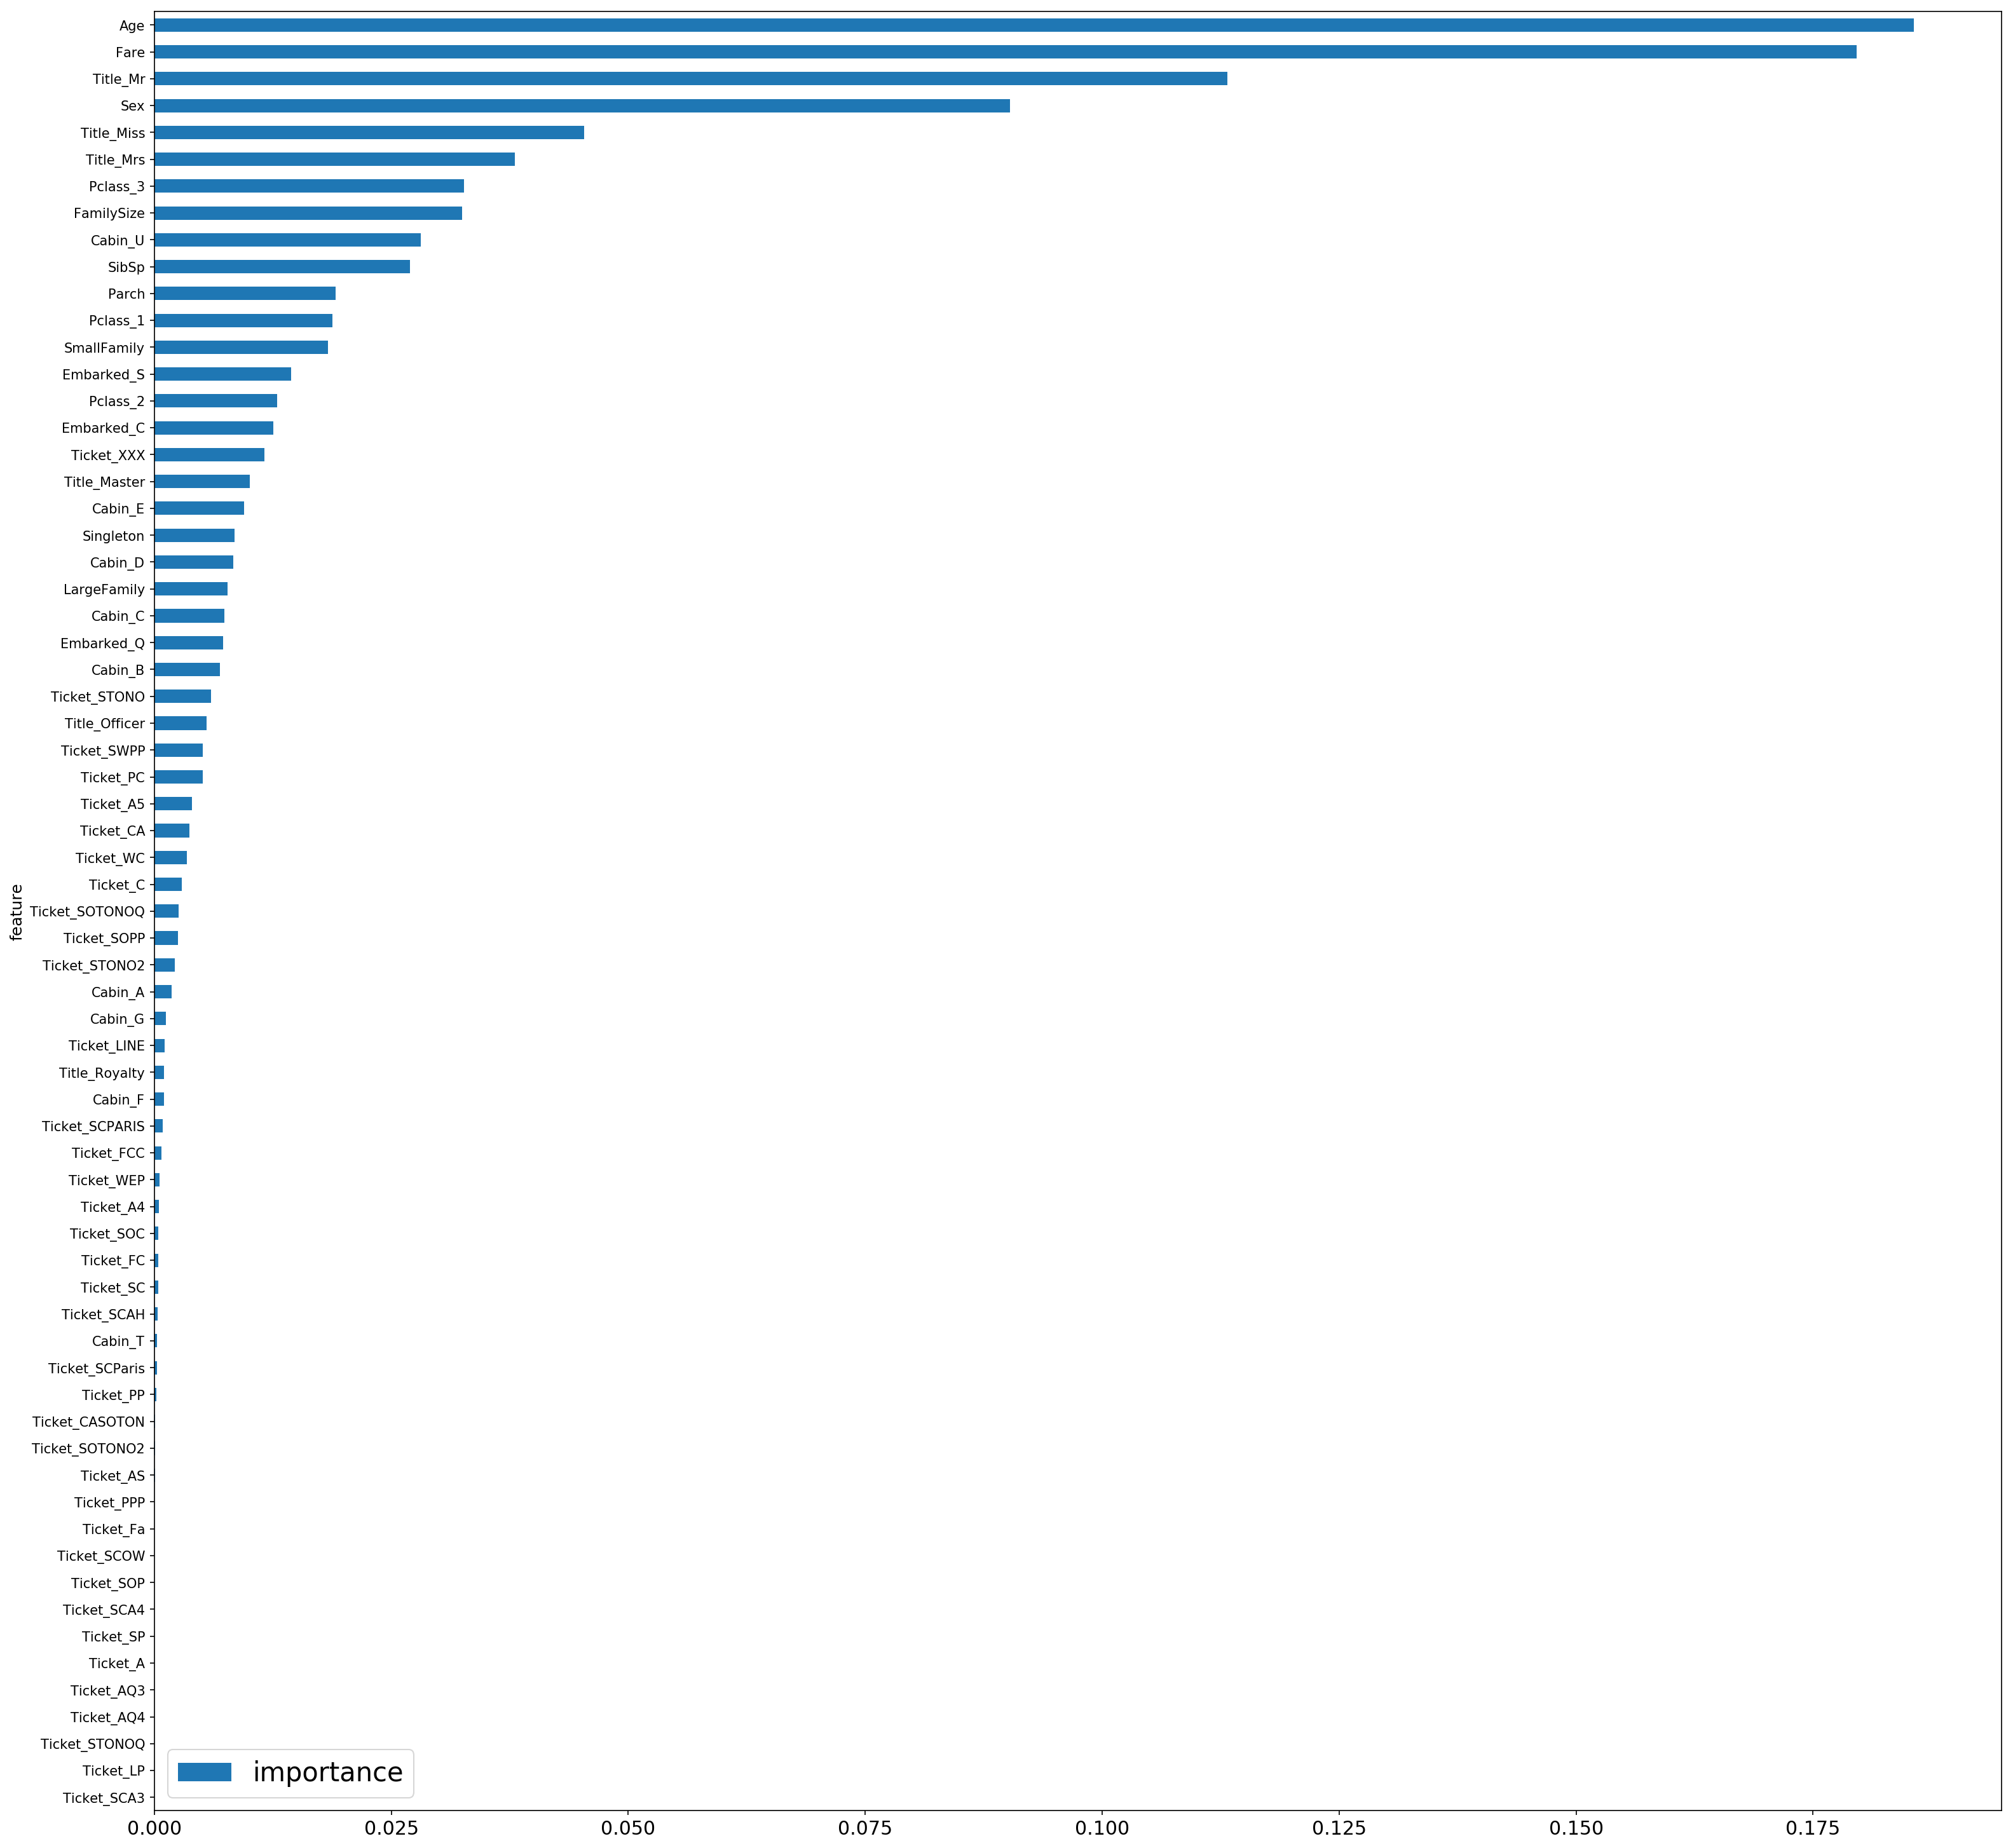

In [67]:
features.plot(kind='barh', figsize=(25, 25))

Como você pode notar, há uma grande importância vinculada a Title_Mr, Age, Fare e Sex.

Há também uma correlação importante com o Passenger_Id.

Vamos agora transformar nosso conjunto de treino e conjuntos de teste em conjuntos de dados mais compactos.

In [68]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

(891, 13)


In [69]:
test_reduced = model.transform(test)
print (test_reduced.shape)

(418, 13)


Reduzimos bastente o número de features.

Vamos ver se vamos usar a versão reduzida ou a versão completa do conjunto de treino.

### Vamos testar diferentes bases de modelos

In [70]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [71]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8125832554019151
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8204360116561997
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8193879537709762
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8249176976842577
****


### Ajuste de hiperparâmetros

Como mencionado no início da parte Modeling, estaremos usando um modelo de Florestas Aleatórias (Random Forest). Pode não ser o melhor modelo para essa tarefa, mas mostraremos como ajustar. Este trabalho pode ser aplicado a diferentes modelos.

Florestas Aleatórias (Random Forest) são bastante úteis. No entanto, eles vêm com alguns parâmetros para ajustar a fim de obter um modelo ideal para a tarefa de previsão.

Para saber mais sobre as Florestas Aleatórias, você pode consultar este <a href="https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/">link</a>:

Além disso, usaremos o conjunto completo de treino.

In [72]:
# mude run_gs para True se você quiser rodar o gridsearch novamente.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Agora que o modelo está construído varrendo várias combinações dos hiperparâmetros, podemos gerar um arquivo de saída para enviar no Kaggle.

In [73]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./predictions/gridsearch_rf.csv', index=False)

### [BONUS]  Combinando diferentes modelos

In [74]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = aux['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

In [75]:
predictions_df.to_csv('./predictions/blending_base_models.csv', index=False)

Para ter uma boa submissão de combinação, os modelos básicos devem ser diferentes e suas correlações não correlacionadas.

# IV - Conclusão

Nós passamos pelos blocos básicos de um pipeline de ciência de dados:

- Exploração e visualização de dados: um passo inicial para formular hipóteses
- Limpeza de dados
- Engenharia de recursos
- Seleção de recursos
- Ajuste de hiperparâmetros
- Submissão
- Combinando modelos

Muitos artigos foram escritos sobre este desafio, então obviamente há espaço para melhorias.

Aqui está o pode ser feito para os próximos passos:

- Cavar mais nos dados e, eventualmente, construir novos recursos.
- Experimente modelos diferentes: regressões logísticas, árvores com inclinação gradual, XGboost, ...
- Experimente as técnicas de aprendizagem de conjunto (empilhamento)
- Executar frameworks auto-ML